## 3. Visualización de datos y análisis estadístico

### 3.1 Carga de datos limpios

In [95]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../src')
from data.data_loader import load_clean_data

# Cargar datos limpios
df_bank = load_clean_data()
display(df_bank.head())

,Income,Number_of_Kids,Number_of_Teenagers,Registration_Date,Monthly_Web_Visits,Frequency,Age,Job,Marital_Status,Education_Level,...,Employment_Variation_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Number_of_Employees,Subscribed_to_Service,Contacted_Date,Latitude,Longitude,Coordinates
Customer_ID,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,04/04/2012,29,Very High,40,housemaid,MARRIED,basic.4y,...,1.1,93.994,-36.4,4.857,5191,no,08/02/2019,41.495,-71.233,"41.495, -71.233"
e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,30/12/2012,7,Low,57,services,MARRIED,high.school,...,1.1,93.994,-36.4,3.617,5191,no,17/06/2017,34.601,-83.923,"34.601, -83.923"
3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,02/02/2012,5,Low,37,services,MARRIED,high.school,...,1.1,93.994,-36.4,4.857,5191,no,17/06/2017,34.939,-94.847,"34.939, -94.847"
9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,21/12/2012,29,Very High,40,admin.,MARRIED,basic.6y,...,1.1,93.994,-36.4,3.617,5191,no,17/06/2017,49.041,-70.308,"49.041, -70.308"
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,20/06/2012,20,High,56,services,MARRIED,high.school,...,1.1,93.994,-36.4,3.617,5191,no,17/06/2017,38.033,-104.463,"38.033, -104.463"


### 4.1. Distribución demográfica básica

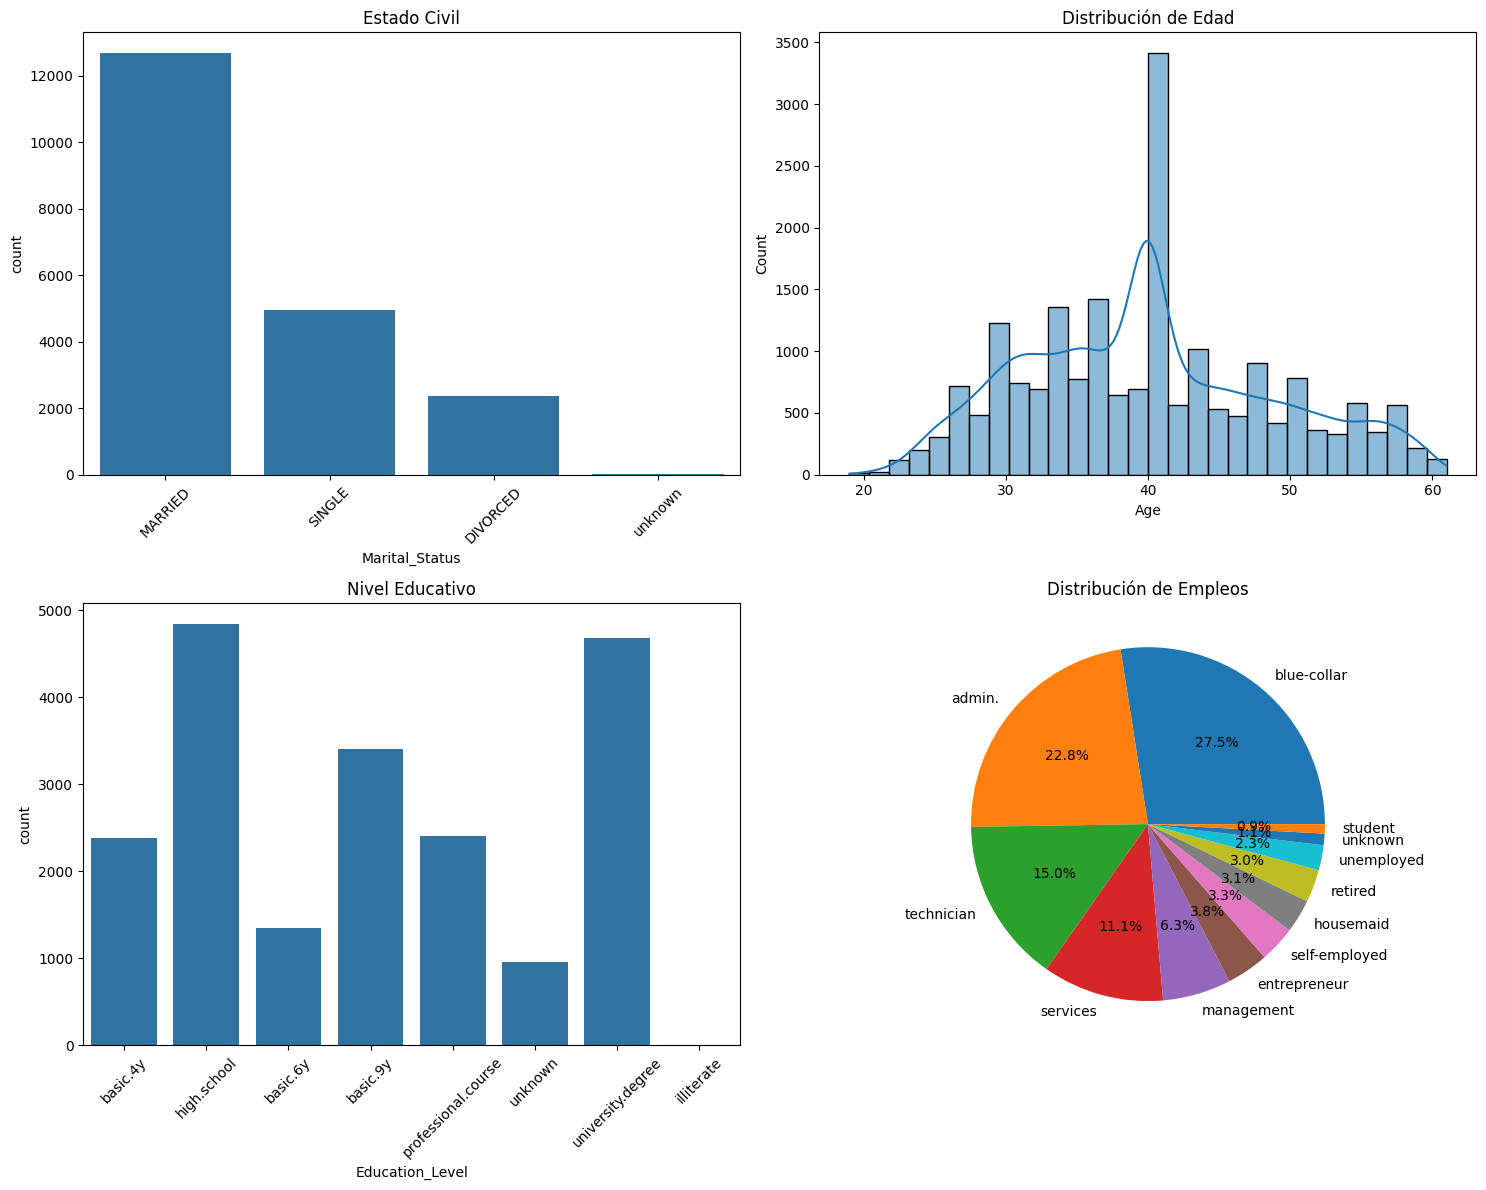

In [96]:
# Configuración del estilo de los gráficos 
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Creamos un subplot de 2x2 para mostrar 4 gráficos demográficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras que muestra la distribución del estado civil (soltero, casado, etc)
sns.countplot(data=df_bank, x='Marital_Status', ax=axes[0,0])
axes[0,0].set_title('Estado Civil')
axes[0,0].tick_params(axis='x', rotation=45)

# Histograma que muestra la distribución de edades de los clientes (kde=True añade una línea suave)
sns.histplot(data=df_bank, x='Age', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Edad')

# Gráfico de barras que muestra el nivel educativo de los clientes
sns.countplot(data=df_bank, x='Education_Level', ax=axes[1,0])
axes[1,0].set_title('Nivel Educativo')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico circular que muestra la distribución de tipos de trabajo
job_counts = df_bank['Job'].value_counts()
axes[1,1].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Distribución de Empleos')

plt.tight_layout()
plt.show()


### 4.2. Análisis financiero

'\nUsuarios entre 15 y 20 años con ingresos superiores a 150000:'

,Age,Income,Education_Level,Job
Customer_ID,,,,
6650b417-5fea-450d-a8ae-e42be3385f96,19,170418,basic.9y,student


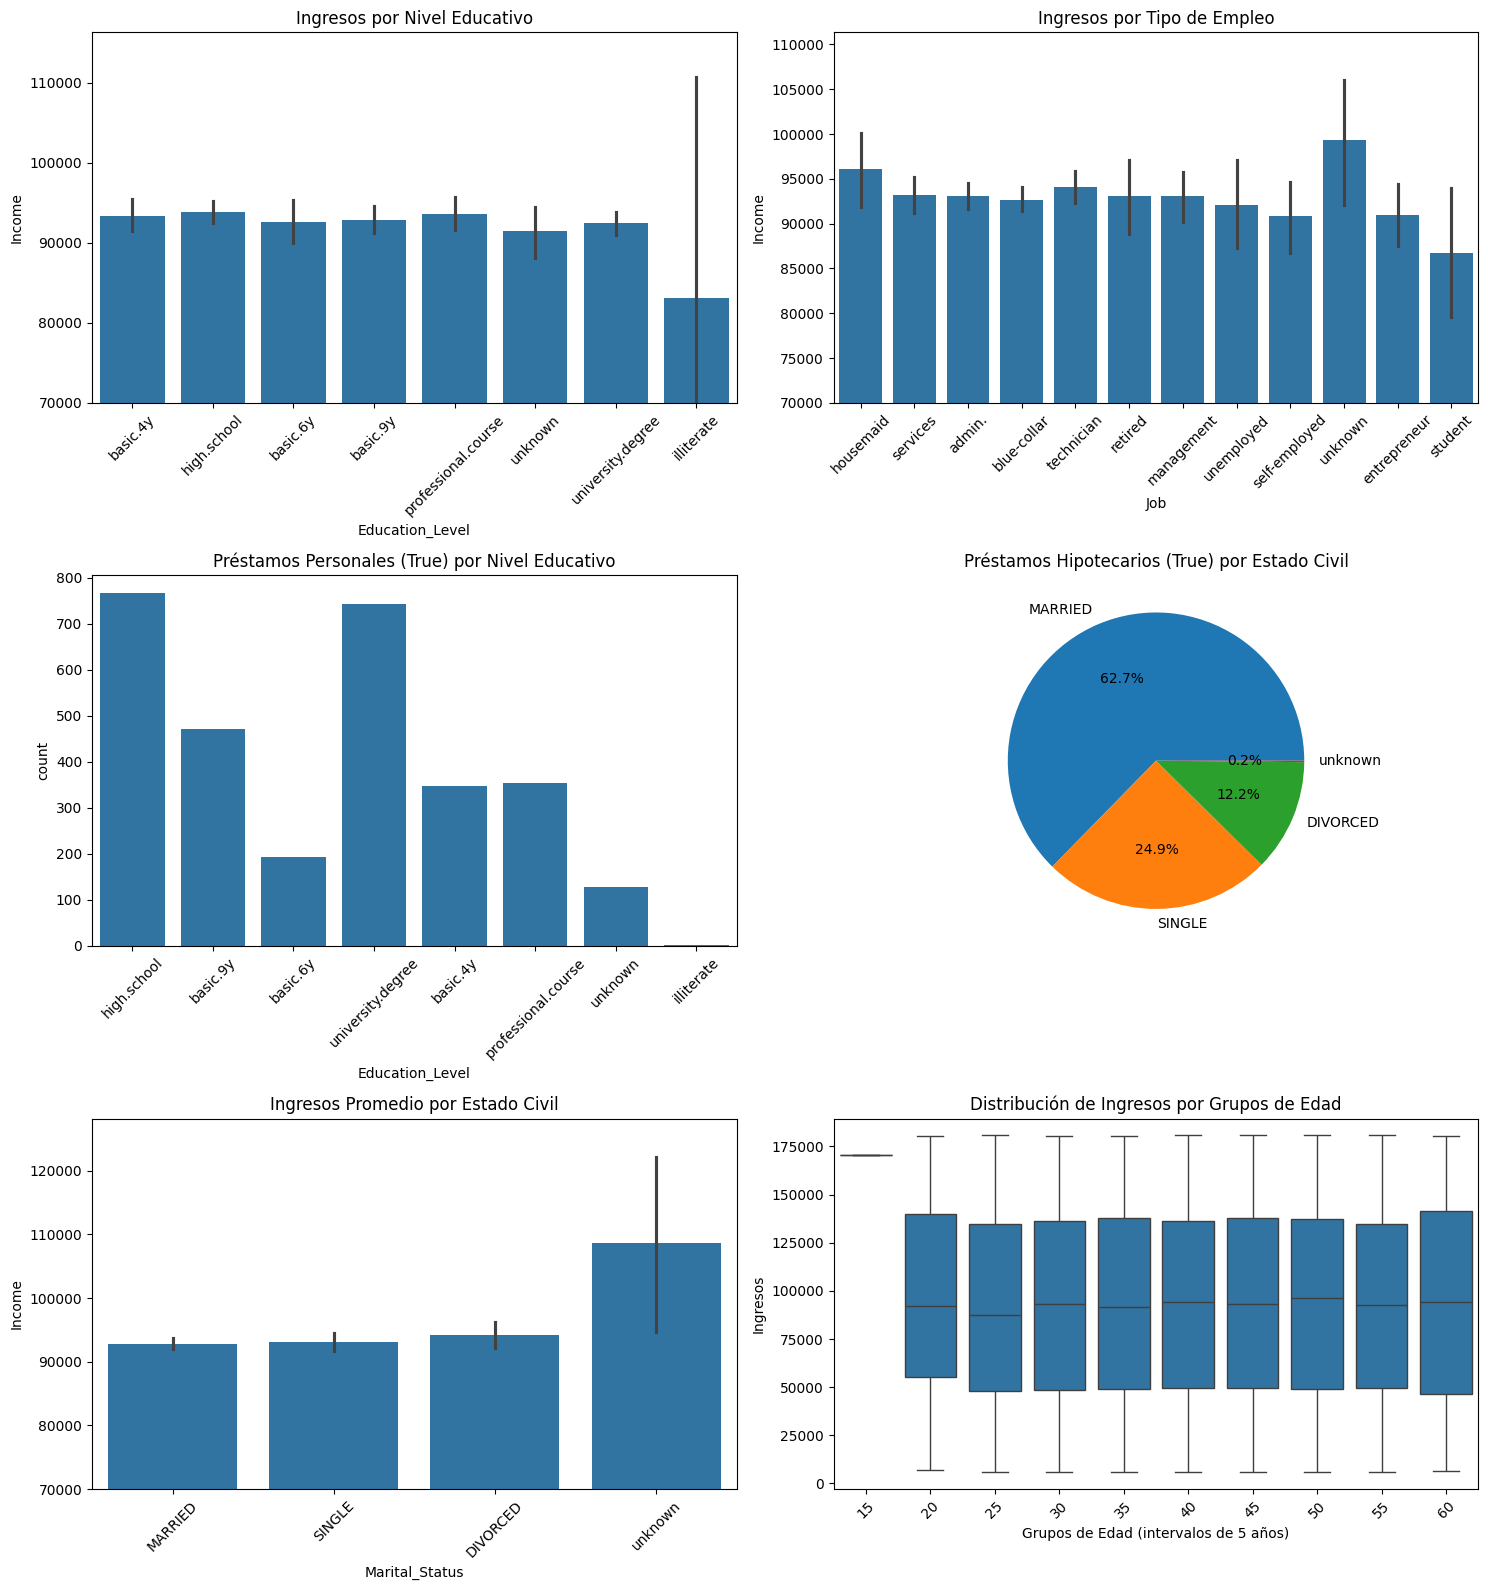

In [97]:
# Crear subplots 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 16))

# Distribución de ingresos según nivel educativo
sns.barplot(data=df_bank, x='Education_Level', y='Income', ax=axes[0,0])
axes[0,0].set_title('Ingresos por Nivel Educativo')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylim(bottom=70000)  # Establecer el límite inferior del eje y en 70000

# Distribución de ingresos según tipo de trabajo
sns.barplot(data=df_bank, x='Job', y='Income', ax=axes[0,1])
axes[0,1].set_title('Ingresos por Tipo de Empleo')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylim(bottom=70000)  # Establecer el límite inferior del eje y en 70000

# Cantidad de préstamos personales por nivel educativo
sns.countplot(data=df_bank[df_bank['Personal_Loan'] == 'True'], x='Education_Level', ax=axes[1,0])
axes[1,0].set_title('Préstamos Personales (True) por Nivel Educativo')
axes[1,0].tick_params(axis='x', rotation=45)

# Cantidad de hipotecas por estado civil
mortgage_by_marital = df_bank[df_bank['Mortgage_Loan'] == 'True']['Marital_Status'].value_counts()
axes[1,1].pie(mortgage_by_marital, labels=mortgage_by_marital.index, autopct='%1.1f%%')
axes[1,1].set_title('Préstamos Hipotecarios (True) por Estado Civil')

# Gráfico de barras que muestra el promedio de ingresos según estado civil
sns.barplot(data=df_bank, x='Marital_Status', y='Income', ax=axes[2,0])
axes[2,0].set_title('Ingresos Promedio por Estado Civil')
axes[2,0].tick_params(axis='x', rotation=45)
axes[2,0].set_ylim(bottom=70000)

# Distribución de ingresos según edad
df_bank['Age_Group'] = (df_bank['Age'] // 5) * 5 # Intervalos de 5 años
sns.boxplot(data=df_bank, x='Age_Group', y='Income', ax=axes[2,1])
axes[2,1].set_title('Distribución de Ingresos por Grupos de Edad')
axes[2,1].set_xlabel('Grupos de Edad (intervalos de 5 años)')
axes[2,1].set_ylabel('Ingresos')
axes[2,1].tick_params(axis='x', rotation=45)

from IPython.display import display

# Encontrar usuarios entre 15 y 20 años con ingresos superiores a 150000 (anomalía en el gráfico de ingresos por edad)
usuarios_jovenes_ricos = df_bank[(df_bank['Age'] > 15) & (df_bank['Age'] < 20) & (df_bank['Income'] > 150000)]

display("\nUsuarios entre 15 y 20 años con ingresos superiores a 150000:")
if len(usuarios_jovenes_ricos) > 0:
    display(usuarios_jovenes_ricos[['Age', 'Income', 'Education_Level', 'Job']])
else:
    display("No se encontraron usuarios que cumplan estos criterios")


plt.tight_layout()
plt.show()

### 4.3. Gráficos de comportamiento de contacto

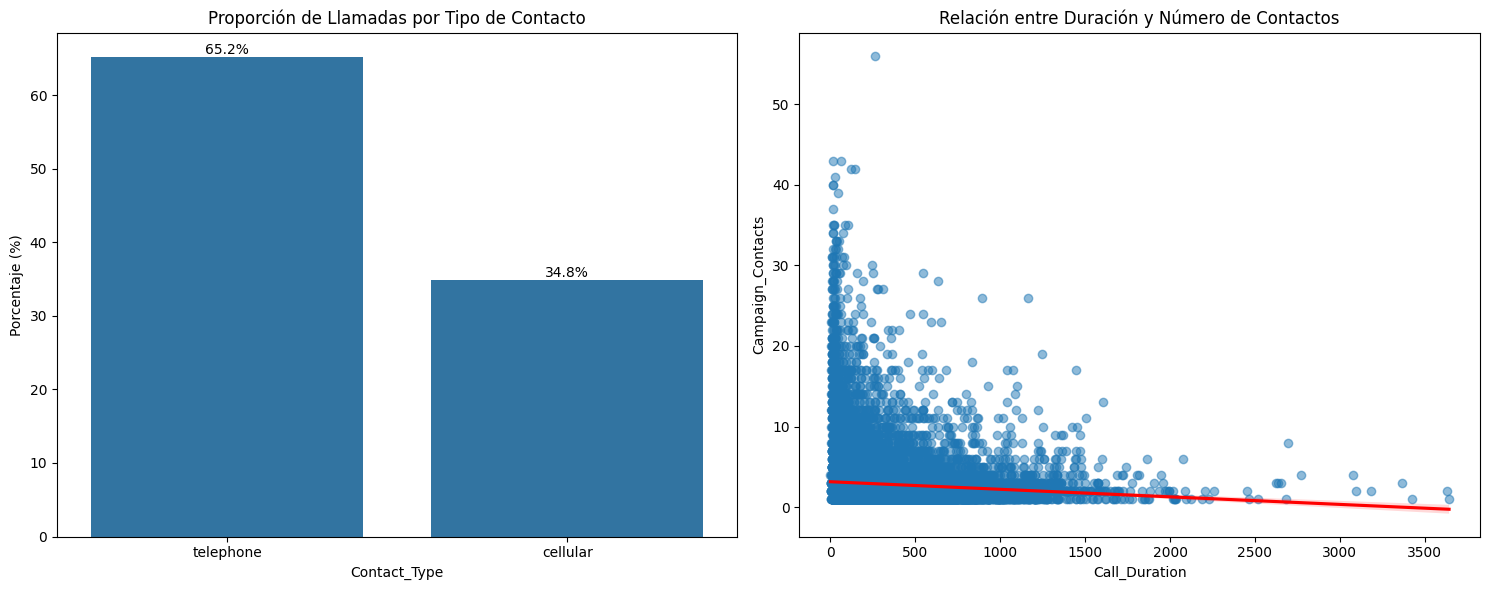

In [98]:
# Crear figura con 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Gráfico de barras para mostrar la proporción de llamadas móviles vs fijas
contact_type_counts = df_bank['Contact_Type'].value_counts(normalize=True) * 100
sns.barplot(x=contact_type_counts.index, y=contact_type_counts.values, ax=axes[0])
axes[0].set_title('Proporción de Llamadas por Tipo de Contacto')
axes[0].set_ylabel('Porcentaje (%)')
# Añadir etiquetas con los porcentajes
for i, v in enumerate(contact_type_counts.values):
    axes[0].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# 4. Scatter plot mejorado con línea de tendencia
sns.regplot(data=df_bank, x='Call_Duration', y='Campaign_Contacts', 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title('Relación entre Duración y Número de Contactos')

plt.tight_layout()
plt.show()

### 4.4. Gráficos de indicadores económicos

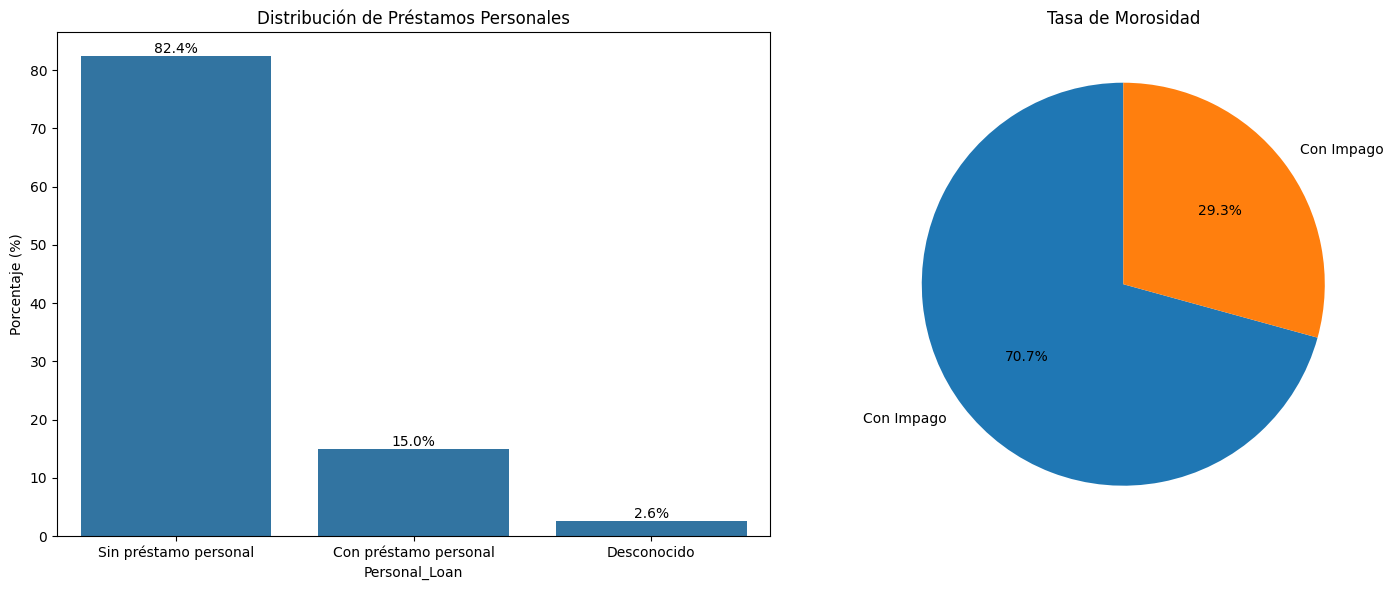

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Gráfico de barras para préstamos personales
personal_loan_counts = df_bank['Personal_Loan'].value_counts(normalize=True) * 100
sns.barplot(x=personal_loan_counts.index, y=personal_loan_counts.values, ax=axes[0])
axes[0].set_title('Distribución de Préstamos Personales')
axes[0].set_ylabel('Porcentaje (%)')

axes[0].set_xticks(personal_loan_counts.index)
axes[0].set_xticklabels([
    "Sin préstamo personal",
    "Con préstamo personal", 
    "Desconocido"
])
for i, v in enumerate(personal_loan_counts.values):
    axes[0].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# 2. Gráfico circular para tasa de morosidad
default_counts = df_bank['Credit_Default'].value_counts(normalize=True) * 100
axes[1].pie(default_counts.values, labels=[f"{'Sin' if i == 0 else 'Con'} Impago" for i in default_counts.index], 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Tasa de Morosidad')

# Ajustar diseño
plt.tight_layout()
plt.show()


### 4.5. Mapa de calor de correlaciones

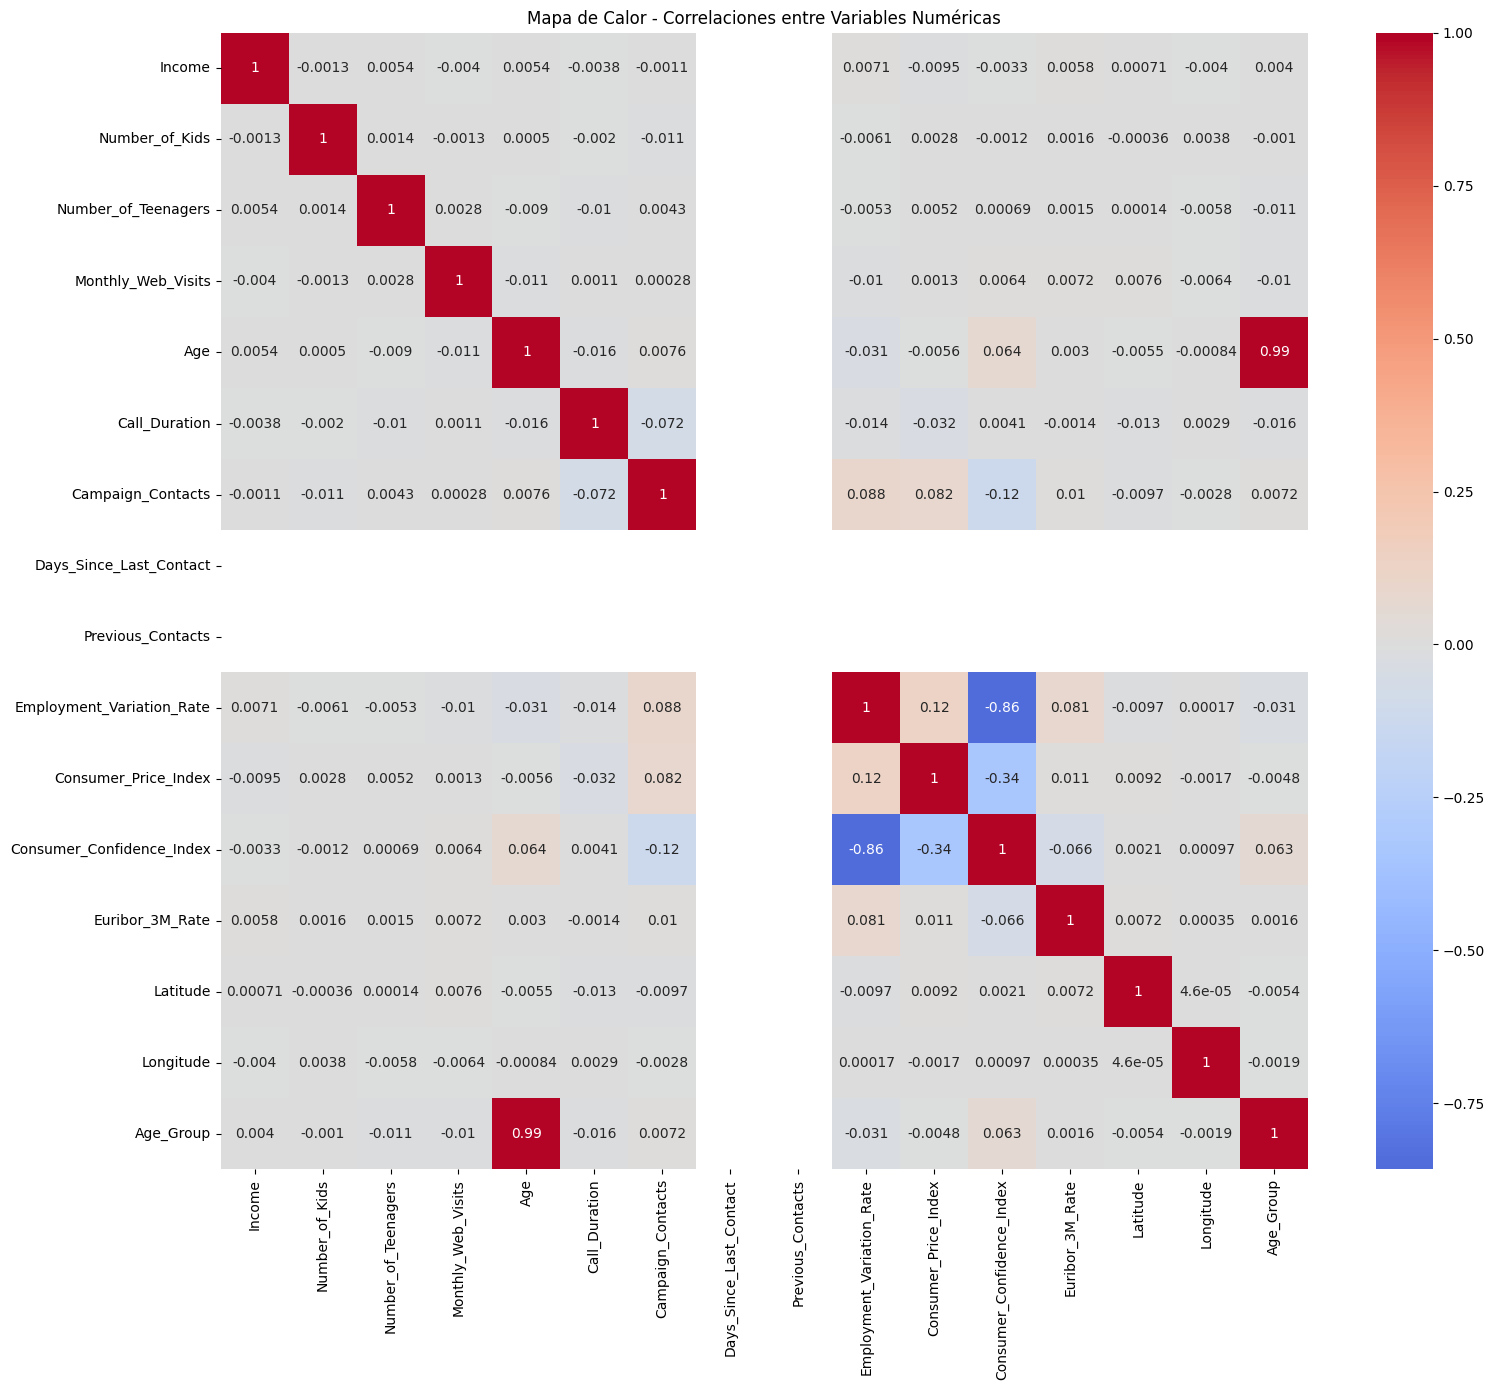

In [100]:
# Crear figura y obtener correlaciones entre variables numéricas
plt.figure(figsize=(16, 14))
numeric_cols = df_bank.select_dtypes(include=[np.number]).columns
correlation_matrix = df_bank[numeric_cols].corr()

# Generar y mostrar mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor - Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()